# Stock(S&P 500) Price forecasting using Geometric Brownian Motion (GBM) and Monte Carlo Simulation (MS)

## Brief introduction to GBM

A Brownian motion is a stochastic process, which can be thought of as a sequence of normally distributed random variable. We denote the Brownina motion at time $ t $ as $ B_t $. Some important properties of Brownian motion includes 
1. $ B_0 = 0  $ 
2. $ B_t \sim N(0, t) $, i.e the variance increases with $ t $ 
3. $ B_{t_1 } - B_{t_0 } \sim N(0, t_1 - t_0 ) $
Now it is clear that the Brownian motion will always centered around 0, because $ \text{E}[B_t] = 0 $, further given that $ B_t \sim N(0, t) $, there is no restrictions that prevent $ B_t $ from being a negative value. These are all the traits that we don't expect a stock price to have, hence how do we get rid of these traits in the Brownian motion? 

To prevent to always centered around 0, we can make use of a _drifted_ Brownina motion, which looks something of the form 
$$ \mu t  + \sigma B_t $$
As $ t $ gets large, the term $ \mu t $ will dominate hence making the model drift away from 0. But if $ \mu < 0 $, this allows the second problem to happen, which is that $ \mu t + \sigma B_t < 0 $. Hence to solve this, we introduce the following correction 
$$ S_t = \exp(\mu t + \sigma B_t) $$
then the above expression is always positive, hence eliminating the problem of it being a negative value. But this produces another problem, which is that 
$$ S_0 = 0  $$
but this is not always the case for stocks. Hence here we make the following change 
$$ S_t = S_0 \exp(\mu t + \sigma B_t) $$
where $S_0$ is any value that we can set it to be(typically the current stock price). This model of $S_t$ is known as the __Geometric Brownian Motion__.

Now one question that we can ask is how can get the values of $ \mu $ and $ \sigma $ (__drft__ and __volatility__ respecitvely)from the stock data. One way to get the value is as follows

\begin{align*}
    S_t & = S_0 \exp (\mu t + \sigma B_t) \\ 
    \log S_t & = \log S_0 + \mu t + \sigma B_t
\end{align*}
since $ t $ is arbitary, we know that the above equation also holds at time $ t -1 $, i.e 
$$ \log S_{t-1} = \log S_0 + \mu (t-1) + \sigma B_{t-1} $$

Combining the equations we get 
$$ \log \left(\cfrac{S_t}{S_{t-1}} \right) = \mu + \sigma (B_t - B_{t-1}) $$
now we may consider taking the expectation on both sides

\begin{align*}
    \text{E} \left[\log \left(\cfrac{S_t}{S_{t-1}} \right) \right] &= \text{E}[\mu + \sigma (B_t - B_{t-1})]     \\ 
                & = \mu + \sigma \text{E}[B_t - B_{t-1}]
\end{align*}
now recall that $ B_t - B_{t-1} \sim N (0, t - (t-1)) = N(0,1) $, hence we get 
$$\text{E} \left[\log \left(\cfrac{S_t}{S_{t-1}} \right) \right] = \mu  $$
Hence we get $\mu$. To $ \sigma$, instead of taking expectation on both sides, we take variance on both sides to get 
\begin{align*}
    \text{Var}\left(\log\left(\cfrac{S_t}{S_{t-1}}\right) \right) &= \text{Var}\left(\mu + \sigma (B_t - B_{t-1})\right) \\ 
    & = \sigma^2 \text{Var}\left(B_t -B_{t-1}\right)
\end{align*}
recall that we have $ B_t - B_{t-1} \sim N(0, t - (t-1)) = N(0,1) $, hence we get 
$$ \text{Var}\left(\log \left(\cfrac{S_t}{S_{t-1}}\right) \right) = \sigma^2 $$
Practically, we get $ \mu, \sigma $ by using the sample and sample standard deviation from historical data of the stock.

## Implementing the GBM

In [3]:
# importing dependancies
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt 


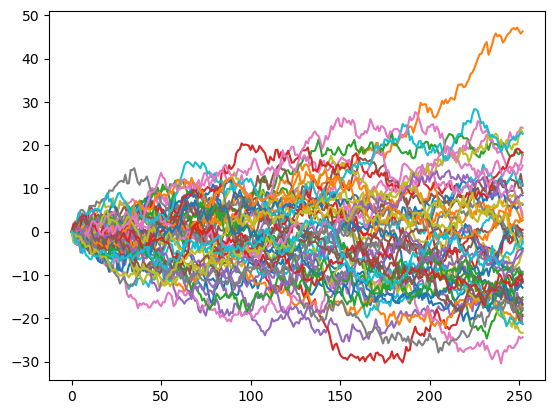

In [4]:
n = 253 # number of steps, set it to 253 because we will be using it predict one year of stock price
T = 252 # time in days 
d = 50 # number of Brownian motion we want to simulate 
times = np.linspace(0,T, n)
dB = np.sqrt(times[1]) * np.random.normal(size = (n-1, d)) # n-1 rows because B0 is 0, so we exclude that 
B0 = np.zeros(shape = (1,d)) 
Bt = np.concatenate((B0, np.cumsum(dB, axis = 0)), axis = 0)
plt.plot(times, Bt)
plt.show()

In [5]:
times.shape

(253,)

In [6]:
# now we want to make the process more reprducible 

def BM(type = 'plot',*, time, steps, samples):
    n = steps+1
    T = time 
    d = samples 
    times = np.linspace(0, T, n)
    dB = np.random.normal(0, times[1], size = (n-1, d)) # n-1 rows because B0 is 0, so we exclude that 
    B0 = np.zeros(shape = (1,d)) 
    Bt = np.concatenate((B0, np.cumsum(dB, axis = 0)), axis = 0)
    if type == 'plot':
        plt.plot(times, Bt)
        plt.show()
    elif type == 'arrays':
        return times, Bt
    else:
        raise 'Type Error'
    

In [7]:
# testing the functions 
times, Bt = BM(time = 252, steps = 252, samples = 50, type = 'arrays')
times

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [8]:
times_d = np.tile(times, (50,1)).T 
times_d.shape

(253, 50)

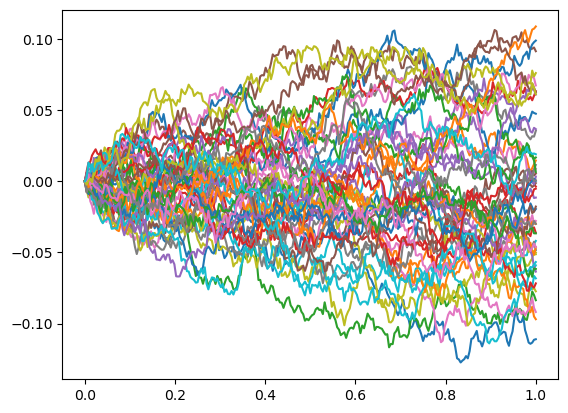

In [9]:
BM(time = 1, steps = 252, samples = 50)

In [10]:
# now we will implement the Geometric Brownian Motion (GBM)

def GBM(type = 'plot', *, S0, time, steps, samples, drift, vol):
    times, Bt = BM(type = 'arrays', time = time, steps = steps, samples = samples)
    times_d = np.tile(times, (samples,1)).T 
    St = S0 * np.exp(drift * times_d + vol * Bt)
    if type == 'plot':
        plt.plot(times, St)
        plt.show()
    elif type == 'arrays':
        return times, St
    else:
        raise 'Type Error'


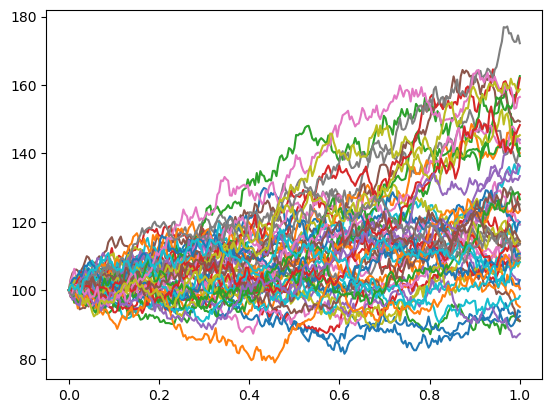

In [11]:
# testing out GBM funtions
GBM(S0 = 100, time = 1, steps = 252, samples = 50, drift = 0.2, vol = 3)

# Monte Carlo Method

We will use monte carlo method to find the average path of the Brownian motion


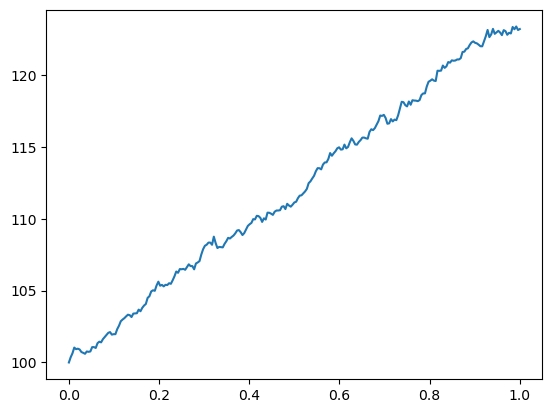

In [270]:
times, St = GBM(S0 = 100, time = 1, steps = 252, samples = 50, drift = 0.2, vol = 3, type = 'arrays')
MC_St = np.sum(St, axis = 1)/ St.shape[1]
plt.plot(times, MC_St)
plt.show()

# Impleting the GBM and MC simulations to forecast a stock(S&P 500) price. 

We will split the data into sample data and test data, the sample data will be used to estimate $\mu$ and $\sigma$. The test data will be compared to our MC GBM path.

In [271]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period = 'max')
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


In [272]:
# removing columns that we don't need 
sp500 = sp500.drop(columns = ['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])
sp500.head()

,Close
Date,
1927-12-30 00:00:00-05:00,17.660000
1928-01-03 00:00:00-05:00,17.760000
1928-01-04 00:00:00-05:00,17.719999
1928-01-05 00:00:00-05:00,17.549999
1928-01-06 00:00:00-05:00,17.660000


<Axes: xlabel='Date'>

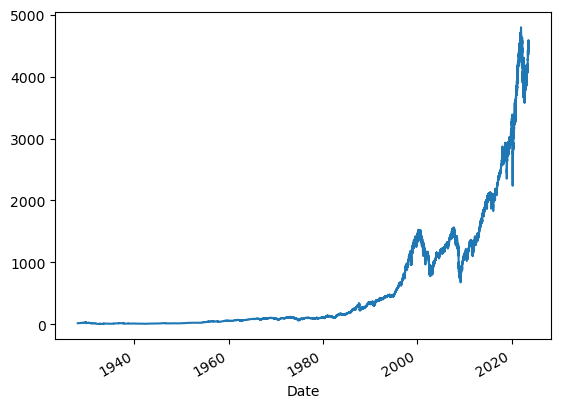

In [273]:
# Visualising the closing price of S&P500

sp500['Close'].plot(kind = 'line')

Next we will split the data into sample and test data and then compute the $\log \left(\cfrac{S_t}{S_{t-1}}\right)$, call it the log ratio. As can be seen in the graph above that recent stock price of S&P500 is way above the price in the 1940s to 2000s. Hence to get a better estimate of $\mu$ and $\sigma$, we will only use the 2 most recent years.

In [274]:
sp500['ytd_close'] = sp500['Close'].shift(1)
sp500 = sp500.dropna()
sp500.head()


,Close,ytd_close
Date,,
1928-01-03 00:00:00-05:00,17.760000,17.660000
1928-01-04 00:00:00-05:00,17.719999,17.760000
1928-01-05 00:00:00-05:00,17.549999,17.719999
1928-01-06 00:00:00-05:00,17.660000,17.549999
1928-01-09 00:00:00-05:00,17.500000,17.660000


In [275]:
# splitting the data 
sp500 = sp500[-504:]

sp500_sample = sp500[:253]
sp500_test = sp500[-252:]

<Axes: xlabel='Date'>

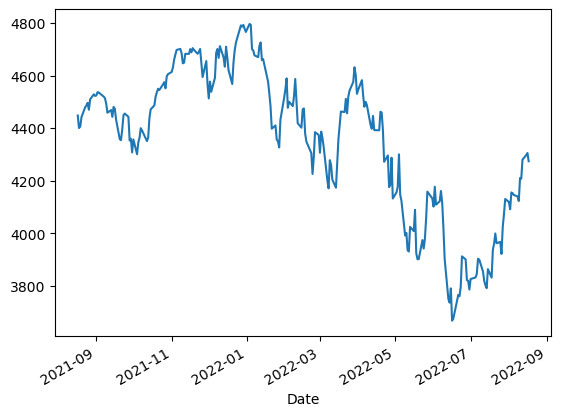

In [276]:
sp500_sample['Close'].plot(kind = 'line')

In [277]:
# Computing the log ratio 
sp500_sample['log_ratio'] = np.log(sp500_sample['Close'] / sp500_sample['ytd_close'])
sp500_sample.head()

/var/folders/3m/33ltlvq53p9f6dd7pv5zd_g00000gn/T/ipykernel_74996/4082390834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_sample['log_ratio'] = np.log(sp500_sample['Close'] / sp500_sample['ytd_close'])


,Close,ytd_close,log_ratio
Date,,,
2021-08-17 00:00:00-04:00,4448.080078,4479.709961,-0.007086
2021-08-18 00:00:00-04:00,4400.270020,4448.080078,-0.010807
2021-08-19 00:00:00-04:00,4405.799805,4400.270020,0.001256
2021-08-20 00:00:00-04:00,4441.669922,4405.799805,0.008109
2021-08-23 00:00:00-04:00,4479.529785,4441.669922,0.008488


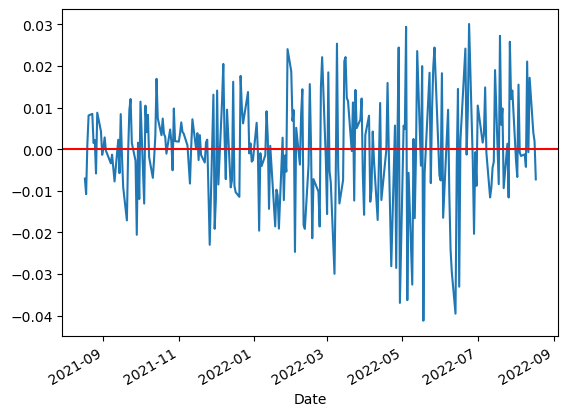

In [278]:
# Plotting log return stock price 
sp500_sample['log_ratio'].plot(kind = 'line')
plt.axhline(y = 0, color = 'r')

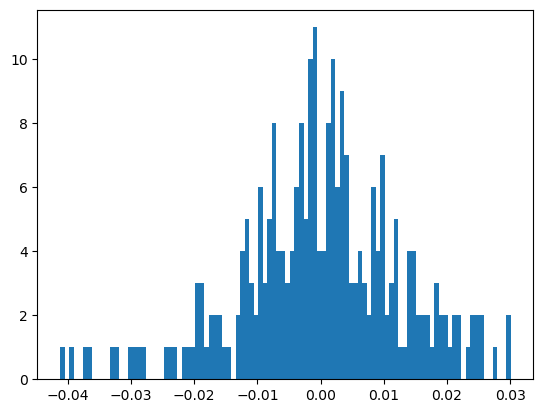

In [279]:
# plotting a historgram of the log return ratio
plt.hist(sp500_sample['log_ratio'], bins = 100)
plt.show()

In [280]:
# computing the estimated drift and volatily 

mu = sp500_sample['log_ratio'].mean()

sigma = sp500_sample['log_ratio'].std(ddof = 1)

mu, sigma

(-0.0001857659231697281, 0.012980729691902605)

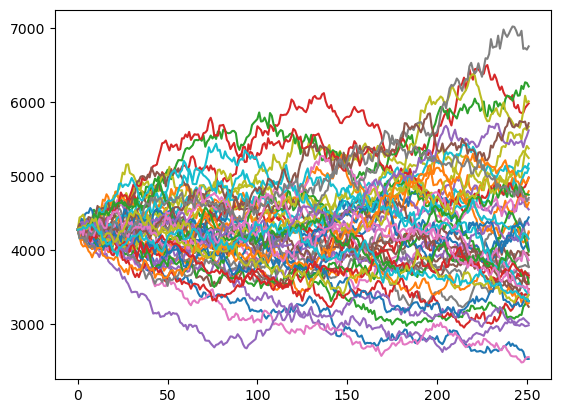

In [309]:
# Monte Carlo simulations of 50 GBM paths using drift and volatility from sample

S0 = sp500_test['Close'][0]
GBM(S0 = S0, time = 251, steps = 251, drift = mu, vol = sigma, samples = 50)

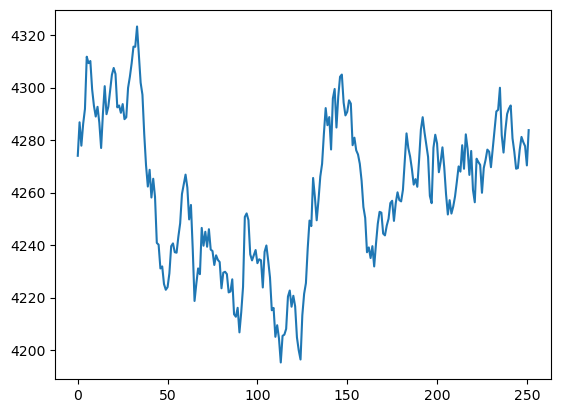

In [312]:
# Computing the average path
times, St = GBM(type = 'arrays', S0 = S0, time =251 , steps = 251, drift = mu, vol = sigma, samples = 50)
MC_St = np.sum(St, axis = 1) / St.shape[1]
plt.plot(times, MC_St)

/var/folders/3m/33ltlvq53p9f6dd7pv5zd_g00000gn/T/ipykernel_74996/2235601519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_test['Pred'] = MC_St


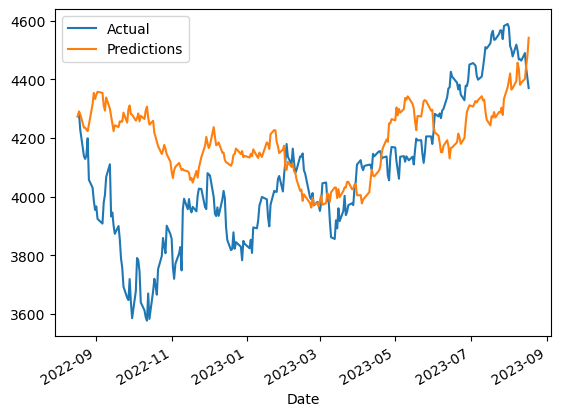

In [300]:
sp500_test['Pred'] = MC_St
sp500_test['Close'].plot(kind = 'line')
sp500_test['Pred'].plot(kind = 'line')
plt.legend(['Actual', 'Predictions']) 
plt.show()

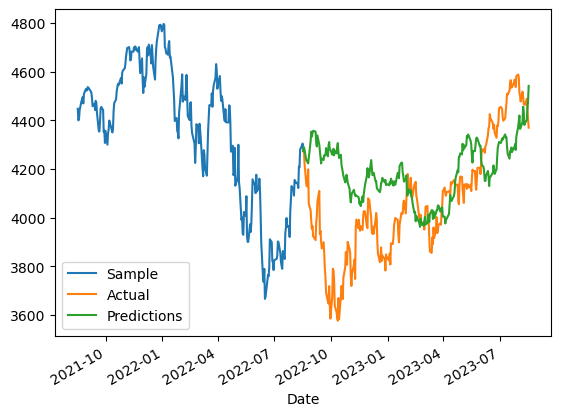

In [301]:
# GBM indicates that the stock will go up, let's how it fits with original stock data
sp500_sample['Close'].plot(kind = 'line')
sp500_test['Close'].plot(kind = 'line')
sp500_test['Pred'].plot(kind = 'line')
plt.legend(['Sample', 'Actual', 'Predictions'])
plt.show()

## Observations: The Brownian Motion Monte Carlo average is not able to detect big jumps as there is not enough variance built up in the time and the possiblility of getting a big jump is also relatively low